## Анализ рынка общественного питания Москвы
- Автор: Хайбуллова Гульяна Рафиловна
- Дата: 11.02.2025г.

### 0.1  Цели и задачи проекта¶
### 0.1.1  Цель
- провести исследовательский анализ данных о заведениях общественного питания в г. Москве с целью выявления оптимальной концепции для инвесторов.
### 0.1.2  Задачи
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
- определить и визуализировать распределение заведений по категориям;
- определить соотношение сетевых и несетевых заведений в целом и по категориям;
- проанализировать распределение количества посадочных мест;
- визуализировать распределение средних рейтингов по категориям;
- выявить топ-15 популярных сетей в г. Москве;
- изучить вариацию среднего чека по районам г.Москвы.
4. Сформулировать выводы по проведённому анализу.

### 0.2  Описание данных
Для анализа представлены данные заведениями общественного питания г. Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:

- файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания;
- Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания.

### 0.2.1  Описание датасета о заведениях общественного питания
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 0 — заведение не является сетевым; 1 — заведение является сетевым.
- seats — количество посадочных мест.
### 0.2.2  Описание датасета о среднем чеке в заведениях общественного питания
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: «Средний счёт: 1000–1500 ₽»; «Цена чашки капучино: 130–220 ₽»; «Цена бокала пива: 400–600 ₽».;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений. Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число. Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»: Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений. Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число. Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## 0.3  Содержимое проекта
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

### 1  1. Загрузка данных и знакомство с ними¶
- Загружаем данные о заведениях общественного питания Москвы. Путь к файлам: /datasets/rest_info.csv и /datasets/rest_price.csv.

In [1]:
# Импортируем библиотеки
import pandas as pd 

In [2]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install phik==0.11.1
from phik import phik_matrix

In [4]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv') 

In [5]:
# Выводим первые строки датафрейма rest_info на экран
rest_info.head() 

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [6]:
# Выводим информацию о датафрейме rest_info
rest_info.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [7]:
# Выводим названия столбцов датафрейма rest_info
rest_info.columns 

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats'],
      dtype='object')

In [8]:
# Применяем метод isna() к датафрейму rest_info
rest_info.isna().sum() 

id             0
name           0
category       0
address        0
district       0
hours        536
rating         0
chain          0
seats       3611
dtype: int64

In [9]:
# Подсчитываем долю строк с пропусками
rest_info.isna().sum() / rest_info.shape[0] 

id          0.000000
name        0.000000
category    0.000000
address     0.000000
district    0.000000
hours       0.063764
rating      0.000000
chain       0.000000
seats       0.429574
dtype: float64

In [10]:
# Выводим первые строки датафрейма rest_price на экран
rest_price.head() 

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [11]:
# Выводим информацию о датафрейме rest_price
rest_price.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [12]:
# Выводим названия столбцов датафрейма rest_price
rest_price.columns 

Index(['id', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup'], dtype='object')

In [13]:
# Применяем метод isna() к датафрейму rest_price
rest_price.isna().sum() 

id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

In [14]:
# Подсчитываем долю строк с пропусками
rest_price.isna().sum() / rest_price.shape[0] 

id                   0.000000
price                0.183095
avg_bill             0.059635
middle_avg_bill      0.224002
middle_coffee_cup    0.868162
dtype: float64

## 1.1  Промежуточный вывод
- Набор данных rest_info содержит 9 столбцов и 8406 строк. Названия столбцов прописаны в едином стиле написания.
- Столбцы id, name, category, address, distcrit, hours содержат строковые данные (object), и данный формат подходит данным столбцам.
- Столбцы rating и seats — числовые. Что соответствует описанию.
- Столбец chain является целочисленным, но представляет собой категориальный признак.
- Столбец hours содержит 536 пропущенных значений. Это может быть связано с отсутствием информации о времени работы некоторых заведений. Доля пропусков составляет 6,3%.
- Столбец seats содержит значительное количество пропущенных значений - 3611. Что составляет значительную долю - 42%. Это может означать, что для многих заведений информация о количестве посадочных мест отсутствует или не была собрана.
- Необходимо принять решение о том, как обрабатывать пропущенные значения в столбцах hours и seats. Возможные варианты: оставить как есть, заполнение средним/медианным значением, заполнение на основе других признаков. Удаление данных пропусков лучше не делать. Так как это исказить результаты анализа.
- Набор данных rest_price содержит 5 столбцов и 4058 строк. Названия столбцов прописаны в едином стиле написания.
- Столбцы id, price, avg_bill содержат строковые данные (object), и данный формат подходит данным столбцам.
- Столбцы middle_avg_bill и middle_coffee_cup — числовые. Что соответствует данным.
- Столбец price содержит 743пропущенных значений, что может указывать на отсутствие информации о ценовой категории для некоторых заведений. Доля пропущенных значений - 18%.
- Столбцы avg_bill и middle_avg_bill имеют пропущенные значения, avg_bill - 242 (доля пропущенных значений 6%), middle_avg_bill - 909 (доля пропущенных значений 22%).
- Столбец middle_coffee_cup содержит большое количество пропущенных значений - 3523, доля пропущенных значений - 87%. Могу предположить, что данные о цене кофе либо не собирались, либо доступны только для очень небольшого числа заведений.

## 1.2  Подготовка единого датафрейма
Объединяем данные двух датасетов в один, с которым продолжим работу.

In [15]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, how='left', on='id') 

In [16]:
# Выводим информацию о датафрейме
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [17]:
# Проверяем распределение данных по значениям столбца category
display('Распределение данных по значениям столбца category:')
df['category'].value_counts() 

'Распределение данных по значениям столбца category:'

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

## 1.3  Промежуточный вывод:
- Количество строк в объединнёном датафрейме: 8406 (значительно больше, чем в rest_price, поэтому how='left' сработал, оставив все строки из rest_info).
- Количество столбцов: 13.
- Типы данных: 4 столбца с типом float64, 1 столбец с типом int64 и 8 столбцов с типом object (строки).
- Пропущенные значения: (Как уже отмечалось ранее, но важно помнить) hours, seats, price, avg_bill, middle_avg_bill, middle_coffee_cup содержат пропущенные значения. Особенно много пропусков в seats и middle_coffee_cup.

## 2  2. Предобработка данных
Подготовим данные к исследовательскому анализу:

- Изучим корректность типов данных и при необходимости проведем их преобразование.
- Все столбцы (id, name, category, address, district, hours, rating, chain, seat, price, avg_bill, middle_avg_bill, middle_coffee_cup) не требуют преобразование. Они уже имеют правильный тип данных.
- Изучим пропущенные значения в данных

In [18]:
# Подсчет пропущенных значений в каждом столбце
missing_values = df.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
print("Количество пропущенных значений в каждом столбце:\n", missing_values_sorted)

Количество пропущенных значений в каждом столбце:
 middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64


In [19]:
# Вывод доли пропущенных значений
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print("\nПроцент пропущенных значений в каждом столбце:\n", missing_percentage_sorted)


Процент пропущенных значений в каждом столбце:
 middle_coffee_cup    93.635498
middle_avg_bill      62.538663
price                60.563883
avg_bill             54.603854
seats                42.957411
hours                 6.376398
id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
rating                0.000000
chain                 0.000000
dtype: float64


In [20]:
# Изучение данных с пропущенными значениями (например, для 'seats')
missing_seats = df[df['seats'].isnull()]
display("Примеры строк с пропущенными значениями в столбце seats:", missing_seats.head()) # Первые 5 строк

'Примеры строк с пропущенными значениями в столбце seats:'

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
12,9384a51a4b2749759234df689b3a4857,Заправка,кафе,"Москва, МКАД, 80-й километр, 1",Северный административный округ,вт-сб 09:00–18:00,4.3,0,NaN,средние,Средний счёт:330 ₽,330.0,NaN


In [21]:
# Изучение данных с пропущенными значениями (например, для 'price')
missing_price = df[df['price'].isnull()]
display("Примеры строк с пропущенными значениями в столбце price:", missing_price.head()) # Первые 5 строк

'Примеры строк с пропущенными значениями в столбце price:'

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180.0,NaN,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN


In [22]:
# Изучение данных с пропущенными значениями (например, для 'avg_bill')
missing_avg_bill = df[df['avg_bill'].isnull()]
display("Примеры строк с пропущенными значениями в столбце 'avg_bill'", missing_avg_bill.head()) # Первые 5 строк

"Примеры строк с пропущенными значениями в столбце 'avg_bill'"

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180.0,NaN,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN


## 2.1  Промежуточный вывод:
Столбцы в датафрейме содержат пропуски:
- hours - 536 (6%)
- seats - 3611 (43%)
- price - 5091 (60%)
- avg_bill - 4590 (55%)
- middle_avg_bill - 5257 (62%)
- middle_coffee_cup - 7871 (93%)
- Анализ примеров строк с пропущенными значениями в столбцах seats, price, avg_bill позволяет предположить, что пропуски, скорее всего, связаны с небольшим размером заведений, особенностями сбора данных и отсутствием обязательного требования указывать необходимую информацию. Эти пропуски не случайны и несут в себе определенную информацию о характере заведений. Поэтому, считаю что не надо заполнять или удалять пропуки. Необходимо тщательно оценить возможные последствия для дальнейшего анализа.

Проверяем данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуем данные в текстовых столбцах, например с названием заведения.

In [23]:
# Проверяем явные дубликаты в датафрейме df
df.duplicated().sum() 

0

Явные дубликаты отсутствуют

In [24]:
# Нормализуем столбцы name и address, а именно приведем к нижнему регистру
df[['name', 'address']] = df[['name', 'address']].apply(lambda x: x.str.lower())

In [25]:
# Проверяем неявные дубликаты в разрезе с названием и адресом заведения
df[['name', 'address']].duplicated().sum()

4

In [26]:
# Удаляем неявные дубликаты, сохраняя данные в новый датафрейм
df_new = df.drop_duplicates(subset=['name', 'address'], keep = 'first')

In [27]:
# Выводим информацию о новом датафрейме
df_new.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              7867 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int64  
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.0+ KB


Для дальнейшей работы создадим столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
- логическое значение True — если заведение работает ежедневно и круглосуточно;
- логическое значение False — в противоположном случае.

In [28]:
# Определяем функцию (create_24_7), которая проверяет, указывает ли строка на круглосуточную работу. 
# Применяем эту функцию к каждому значению в hours столбце.
df_new = df_new.copy() 

def create_24_7(hours):
    if isinstance(hours, str):
        hours = hours.lower()
        if 'ежедневно' in hours and 'круглосуточно' in hours:
            return True
    return False
# Создаём новый столбец (is_24_7), в котором хранятся результаты (True или False) запуска функции.
df_new['is_24_7'] = df_new['hours'].apply(create_24_7)

In [29]:
# Выводим информацию о датафрейме
df_new.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              7867 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int64  
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 927.2+ KB


In [30]:
# Выводим уникальные значения столбца 'is_24_7'
df_new['is_24_7'].unique()

array([False,  True])

In [31]:
# Выводим распределение значений столбца 'is_24_7'
df_new['is_24_7'].value_counts()

False    7672
True      730
Name: is_24_7, dtype: int64

In [32]:
# Выводим первые строки датафрейма df_new на экран
df_new.head() 

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


## 2.2  Промежуточный вывод
- Проверили данные на явные и неявные дубликаты. Явных дубликатов не оказалось.
- Неявные дубликаты проверили в разрезе с названием и адресом заведения. Перед этим привели данные столбцы к нижнему регистру.
- Удалили 4 неявных дубликата.
- Создали столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7.
- Количество заведений, которые работают ежедневно и круглосуточно - 730. Это относительно небольшая часть по отношению ко всем данным.

## 3  3. Исследовательский анализ данных
Проведем исследовательский анализ исходных данных.

### 3.1  Задача 1
Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории. Результат сопроводим подходящей визуализацией.

In [33]:
df_new['category'].value_counts() 

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [34]:
category_counts = df_new['category'].value_counts(normalize=True) * 100
display("Доля каждой категории (%):", category_counts)

'Доля каждой категории (%):'

кафе               28.278981
ресторан           24.303737
кофейня            16.817424
бар,паб             9.093073
пиццерия            7.533920
быстрое питание     7.176863
столовая            3.749107
булочная            3.046894
Name: category, dtype: float64

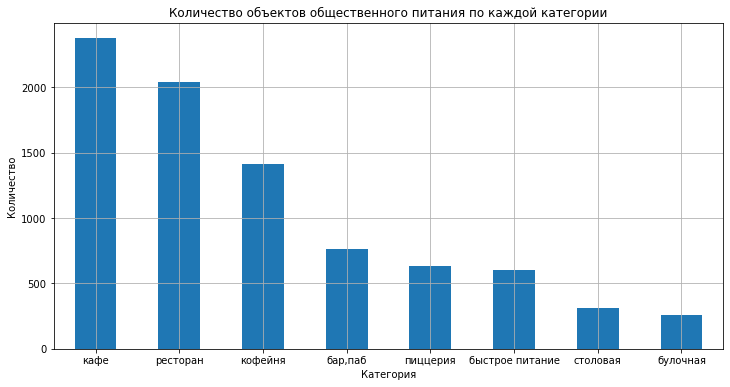

In [35]:
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_new['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество объектов общественного питания по каждой категории'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

### 3.2  Вывод:
- Кафе (2376) и рестораны (2042) являются наиболее распространенными типами заведений в нашем наборе данных и вместе составляют значительную часть всех заведений.
- Кофейни (1413) составляют значительную часть предприятий общественного питания, что говорит о сильной кофейной культуре в регионе.
- Столовые (315) и булочные (256) предлагают более традиционные или бюджетные варианты питания, хотя их количество значительно меньше, чем кафе и ресторанов.

### 3.3  Задача 2
Какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [36]:
# Выводим количество заведений по административным районам Москвы
df_new['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [37]:
district_counts = df_new['district'].value_counts(normalize=True) * 100
display("Доля по администратиным округам (%):", district_counts)

'Доля по администратиным округам (%):'

Центральный административный округ         26.684123
Северный административный округ            10.687931
Южный административный округ               10.616520
Северо-Восточный административный округ    10.592716
Западный административный округ            10.116639
Восточный административный округ            9.497739
Юго-Восточный административный округ        8.497977
Юго-Западный административный округ         8.438467
Северо-Западный административный округ      4.867889
Name: district, dtype: float64

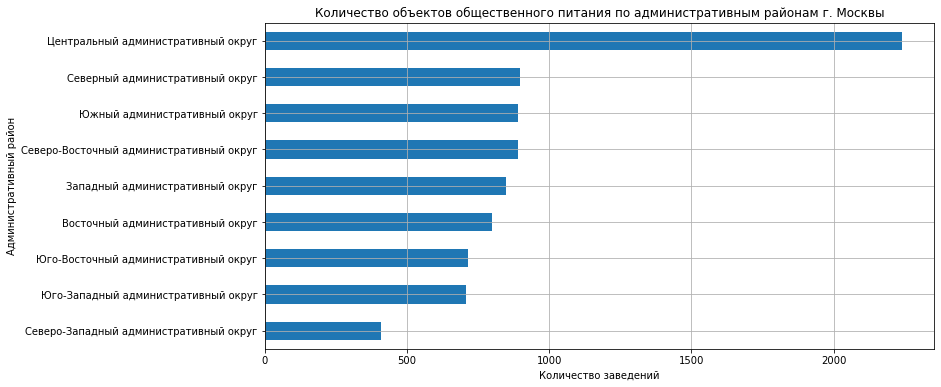

In [38]:
plt.figure(figsize=(12, 6))

# Строим горизонтальную столбчатую диаграмму с помощью pandas через plot(kind='barh')
df_new['district'].value_counts().sort_values(ascending=True).plot(
               kind='barh', # Тип графика - горизонтальная столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество объектов общественного питания по административным районам г. Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Административный район')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

In [39]:
# Выводим количество заведений по категориям в Центральном административном округе Москвы
central_district_data = df_new[df_new['district'] == 'Центральный административный округ']
central_district_data['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

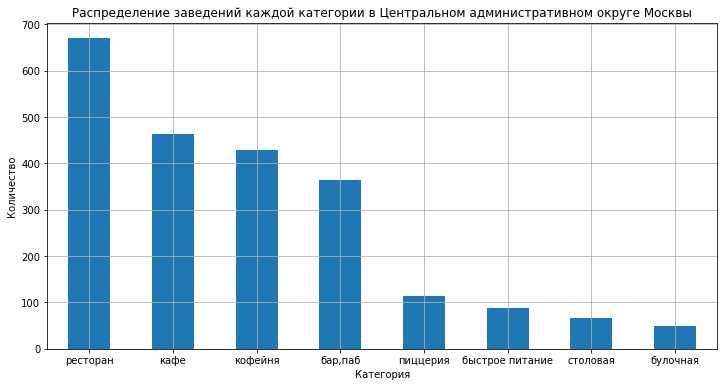

In [40]:
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
central_district_data = df_new[df_new['district'] == 'Центральный административный округ']
central_district_data['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений каждой категории в Центральном административном округе Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

## 3.4  Вывод
- В Центральном административном округе (2242 заведения) значительно выше концентрация ресторанов и кафе по сравнению со всеми остальными округами. Это говорит о том, что он является крупным центром общественного питания в городе.
- В других административных районах (Северном, Южном, Северо-Восточном, Западном, Восточном, Юго-Восточном, Юго-Западном) количество заведений примерно одинаковое и составляет от 700 до 900.
- В Северо-Западном административном округе (409 учреждений) заметно меньше учреждений, чем в других округах (за исключением ЦАО).
- Рестораны (670) являются самой распространенной категорией в Центральном административном округе. Вероятно, это связано с тем, что ЦАО является главным деловым, туристическим и развлекательным центром города
- Кафе (464) и кофейни (428) также широко представлены, что подтверждает идею о том, что в городе в целом процветает культура кофеен.
- Баланс между повседневными и быстрыми вариантами: бары/пабы (364), пиццерии (113) и заведения быстрого питания (87).

### 3.5  Задача 3
Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

In [41]:
# Выведем количество заведений в разрезе сетевых (1) и несетевых (0) по категориям
category_counts_by_chain = df_new.groupby('chain')['category'].value_counts()
display (category_counts_by_chain)

chain  category       
0      кафе               1597
       ресторан           1313
       кофейня             693
       бар,паб             596
       быстрое питание     371
       пиццерия            303
       столовая            227
       булочная             99
1      кафе                779
       ресторан            729
       кофейня             720
       пиццерия            330
       быстрое питание     232
       бар,паб             168
       булочная            157
       столовая             88
Name: category, dtype: int64

In [42]:
# Выводим общее количество сетевых и несетевых заведений
# Считаем долю каждой категории в рамках каждого типа: сетевого или несетевого заведения
chain_totals = df_new['chain'].value_counts()
category_proportions = category_counts_by_chain.div(chain_totals, level='chain')
display (category_proportions)

chain  category       
0      кафе               0.307174
       ресторан           0.252549
       кофейня            0.133295
       бар,паб            0.114637
       быстрое питание    0.071360
       пиццерия           0.058280
       столовая           0.043662
       булочная           0.019042
1      кафе               0.243209
       ресторан           0.227599
       кофейня            0.224789
       пиццерия           0.103028
       быстрое питание    0.072432
       бар,паб            0.052451
       булочная           0.049017
       столовая           0.027474
dtype: float64

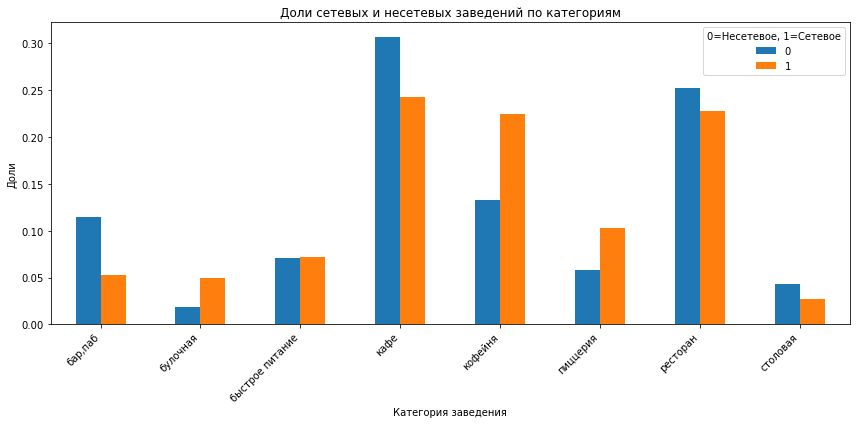

In [43]:
category_counts_by_chain = df_new.groupby('chain')['category'].value_counts()
chain_totals = df_new['chain'].value_counts()
category_proportions = category_counts_by_chain.div(chain_totals, level='chain')
category_proportions.unstack(level='chain')
category_proportions_unstacked = category_proportions.unstack(level='chain')

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
category_proportions_unstacked.plot(kind='bar', figsize=(12, 6))
plt.title('Доли сетевых и несетевых заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Доли')
plt.xticks(rotation=45, ha='right')
plt.legend(title='0=Несетевое, 1=Сетевое')
plt.tight_layout()
plt.show()

### 3.6  Вывод
- Кафе играют ключевую роль: кафе составляют наибольшую долю в несетевых заведениях (30%) и сетевых заведениях (24%), что подчеркивает их важность для обоих типов бизнеса.
- Рестораны также занимают высокую долю как среди несетевых заведениях (25%) и сетевых заведениях (23%).
- Наименьшую долю занимают столовые и булочные: в сетевых и в несетвых заведениях менее 5%.

In [44]:
# Считаем общее количество заведений каждой категории
total_category_counts = df_new['category'].value_counts()

# Группируем по категории и сетевому статусу
category_counts_by_chain = df_new.groupby(['category', 'chain']).size().unstack(fill_value=0)
category_counts_by_chain = category_counts_by_chain.sort_values(by=[1, 0], ascending=[False, False])

# Считаем процент сетевых и несетвых заведений для каждой категории
category_counts_by_chain['percent_chain'] = (category_counts_by_chain[1] / (category_counts_by_chain[0] + category_counts_by_chain[1])) * 100
category_counts_by_chain['percent_non_chain'] = (category_counts_by_chain[0] / (category_counts_by_chain[0] + category_counts_by_chain[1])) * 100
display (category_counts_by_chain)

chain,0,1,percent_chain,percent_non_chain
category,,,,
кафе,1597,779,32.786195,67.213805
ресторан,1313,729,35.700294,64.299706
кофейня,693,720,50.955414,49.044586
пиццерия,303,330,52.132701,47.867299
быстрое питание,371,232,38.474295,61.525705
"бар,паб",596,168,21.989529,78.010471
булочная,99,157,61.328125,38.671875
столовая,227,88,27.936508,72.063492


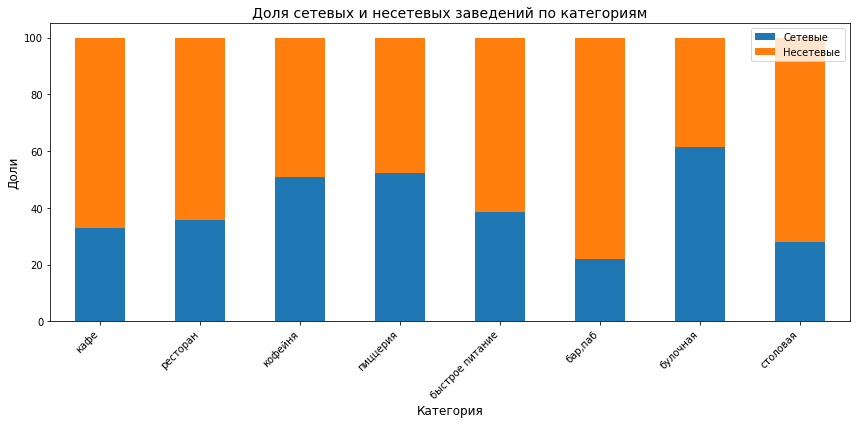

In [45]:
ax = category_counts_by_chain[['percent_chain', 'percent_non_chain']].plot(kind='bar',
                                                                             stacked=True,
                                                                             figsize=(12, 6))


plt.title('Доля сетевых и несетевых заведений по категориям', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Доли', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.legend(['Сетевые', 'Несетевые'], loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

## 3.7  Вывод
- Все категории заведений представлены как сетевые, так и несетевые.
- В большинстве категорий: кафе (67%), ресторан (64%), быстрое питание (62%), бар/паб (78%), столовая(72%) преобладают несетевые заведения. Это может говорить о более низком пороге входа, большей гибкости или акценте на уникальности и локальном рынке.
- В категориях булочная (61%) и пиццерия (52%) сетевых заведений больше, чем несетевых. Это может указывать на то, что для этих категорий масштабирование и стандартизация более важны для успеха. Кофейни также демонстрируют высокую долю сетевых заведений, почти наравне с несетевыми.

### 3.8  Задача 4
Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.

'Медиана количества посадочных мест по категориям:'

category
бар,паб            82.0
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64

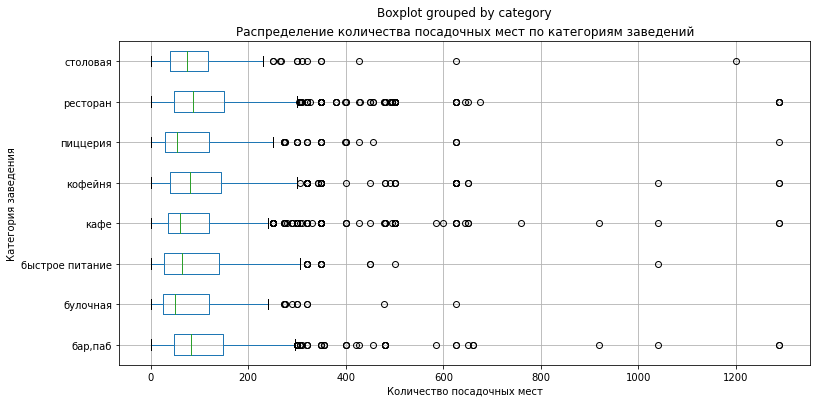

In [46]:
# Вычисляем медиану количества мест по каждой категории
median_seats_by_category = df_new.groupby('category')['seats'].median()

# Выводим медианы
display("Медиана количества посадочных мест по категориям:", median_seats_by_category)

# Строим boxplot (необязательно, но полезно для визуализации)
df_new.boxplot(column='seats',
               by='category',
               vert=False,
               figsize=(12, 6))
plt.title('Распределение количества посадочных мест по категориям заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория заведения')
plt.grid(True)
plt.show()

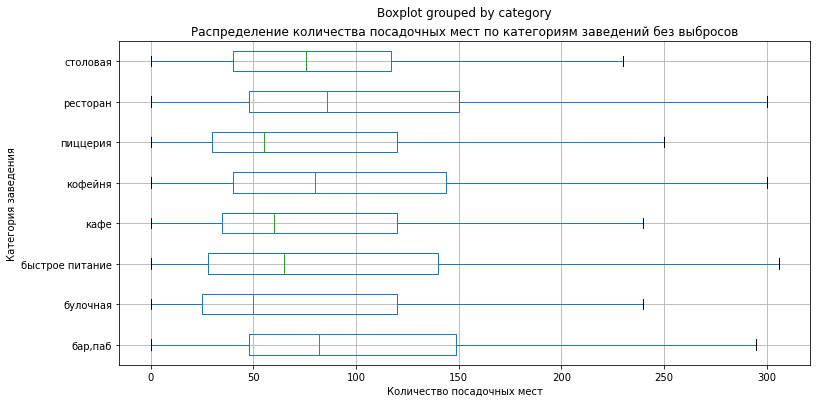

In [47]:
bp = df_new.boxplot(figsize=(12, 6), column='seats', by='category', vert=False, showfliers=False)

plt.title('Распределение количества посадочных мест по категориям заведений без выбросов')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория заведения')
plt.show()

In [48]:
median_seats = df_new.groupby('category')['seats'].median()
display(median_seats)

category
бар,паб            82.0
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64

### 3.9  Вывод
- Точки, расположенные далеко справа на диаграмме размаха, указывают на заведения с необычно большим количеством посадочных мест по сравнению с другими заведениями в той же категории. Это может означать: заведение может быть большим (например, фудкорт в торговом центре, крупный ресторан, банкетный зал в ресторане, театр с обслуживанием питанием), также возможно количество мест было указано неверно, и может быть обусловленно сезонностью. Данные предоставлены за лето 2022г. А летом многие точки общепита увеличивают посадочные места, добавляя веранды на улице.
- Без учета выбросов, усы диаграммы также уходят далеко вправо. Это может означать, что внутри каждой категории заведения могут быть различные варианты количества посадочных мест.
- Медианное количество посадочных мест значительно варьируется в зависимости от категории заведения, что отражает различия в концепциях, целевой аудитории и бизнес-моделях.
- Большие значения медианы у ресторанов (86,0), баров (82,0), кофеин (80,0). В этих категориях ориентированы на предоставление сидячих мест для посетителей.
- Наименьшие значения медианы у булочных (50,0), пиццерий (55,0), кафе (60,0). Можно предположить, что заведения данных категорий нацелены преимущественно на обслуживание клиентов на вынос.

### 3.10  Задача 5
Исследуем рейтинг заведений. Визуализирум распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [49]:
# Выводим средний рейтинг по категориям заведений
average_ratings = df_new.groupby('category')['rating'].mean().sort_values(ascending=False)
display(average_ratings)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

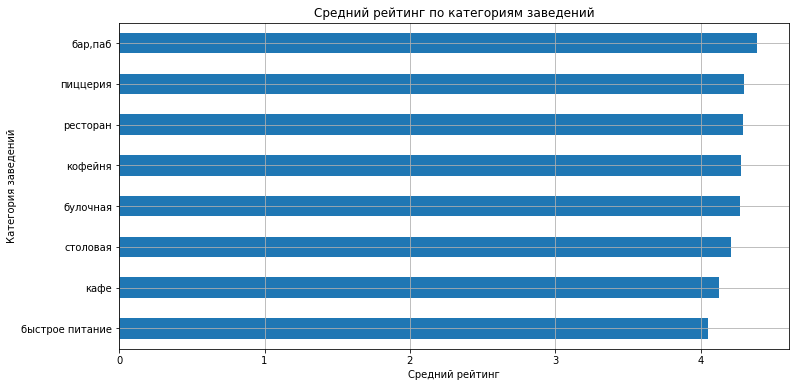

In [50]:
average_ratings = df_new.groupby('category')['rating'].mean().sort_values(ascending=True)
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
average_ratings.plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний рейтинг по категориям заведений'
)

# Настраиваем оформление графика
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

## 3.11  Вывод
- Средние оценки по всем категориям относительно высоки и составляют примерно от 4,05 до 4,39. Это говорит о том, что в целом заведения такого типа воспринимаются положительно.
- Средние оценки в разных категориях немного отличаются. В категориях с самыми высокими оценками («бар, паб» и «пиццерия») средние оценки заметно выше, чем в категории с самыми низкими оценками («быстрое питание»).

### 3.12  Задача 6
Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Постром и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

In [51]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_new[['category', 'district', 'rating', 'seats',
                             'chain', 'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False) 

interval columns not set, guessing: ['rating', 'seats', 'chain']
Корреляционная матрица с коэффициентом phi_k


,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


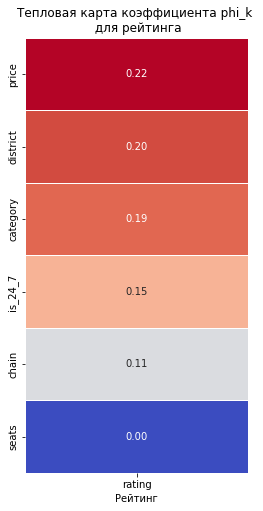

In [52]:
# Строим тепловую карту
plt.figure(figsize=(4, 8))

# Сохраняем матрицу корреляции признака рейтинг с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для рейтинга')
plt.xlabel('Рейтинг')

# Выводим график
plt.show() 

## 3.13  Вывод
- Согласно этому анализу, выявили,что показатель категории цен (0,22) имеет самую сильную корреляцию с рейтингом. Это означает, что существует взаимосвязь: чем выше цена в ресторане, тем выше рейтинг. Также рейтинг зависит от административного района (0,20).
- Количество посадочных мест и является ли заведение сетевым или нет не влияют на рейтинг заведения.

'Средний рейтинг по ценовой категории:'

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float64

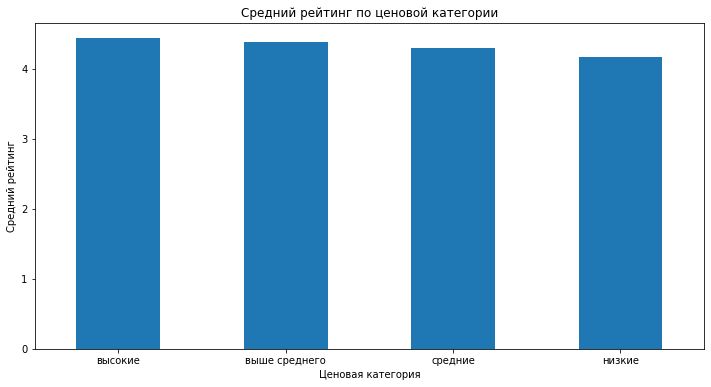

In [53]:
# Проверяем самую сильную связь по ценовой категории и смотрим средний рейтинг
grouped_data = df_new.groupby('price')['rating'].mean().sort_values(ascending=False)
display("Средний рейтинг по ценовой категории:")
display(grouped_data)
    
plt.figure(figsize=(12, 6))
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
grouped_data.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний рейтинг по ценовой категории'
)

# Настраиваем оформление графика
plt.xlabel('Ценовая категория')
plt.ylabel('Средний рейтинг')

# Выводим график
plt.show() 


### 3.14  Вывод
- Согласно этому анализу, выявили,что показатель категории цен (0,22) имеет самую сильную корреляцию с рейтингом. Наблюдается общая тенденция к увеличению среднего рейтинга по мере роста ценовой категории. Заведения с «высокими» ценами имеют самый высокий средний рейтинг (4,44), а заведения с «низкими» ценами — самый низкий (4,17). Это говорит о том, что посетители в целом более довольны заведениями с более высокими ценами. Это означает, что существует взаимосвязь: чем выше цена в ресторане, тем выше рейтинг.
- Также рейтинг зависит от административного района (0,20).
- Количество посадочных мест и является ли заведение сетевым или нет не влияют на рейтинг заведения.

### 3.15  Задача 7
Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся?

In [54]:
# Делаем фильтрацию по сетевым заведениям
chain_establishments = df_new[df_new['chain'] == 1]
# Выводим количество заведений для каждого уникального наименования сети
establishment_counts = chain_establishments['name'].value_counts()
# Выводим топ-15
top_15_chains = establishment_counts.head(15)
# Присваиваем индекс и фильтруем в новом списке
top_15_chain_names = top_15_chains.index
top_15_data = df_new[df_new['name'].isin(top_15_chain_names)]
# Выводим средний рейтинг по списку топ-15
average_ratings = top_15_data.groupby('name')['rating'].mean()
average_ratings = average_ratings.reindex(top_15_chain_names)
# Создаем словарь с именами необходимых столбцов и выводим его на экран
results_df = pd.DataFrame({
    'Количество заведений': top_15_chains,
    'Средний рейтинг': average_ratings
})
display(results_df)

,Количество заведений,Средний рейтинг
шоколадница,120,4.177500
домино'с пицца,76,4.171429
додо пицца,74,4.286486
one price coffee,71,4.069444
яндекс лавка,69,3.872464
cofix,65,4.075385
prime,50,4.116000
хинкальная,44,4.322727
кофепорт,42,4.147619
кулинарная лавка братьев караваевых,39,4.394872


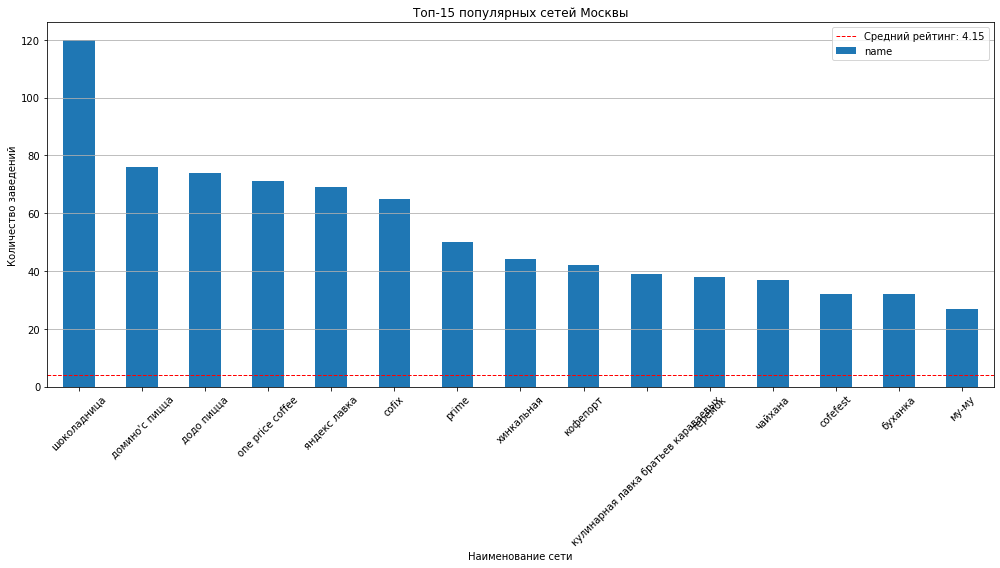

In [55]:
plt.figure(figsize=(14, 8)) 

top_15_chains.plot(kind='bar',
                   title='Топ-15 популярных сетей Москвы',
                   ylabel='Количество заведений',
                   xlabel='Наименование сети',
                   rot=45) 
# Calculate the overall average rating of the top 15 chains
overall_average_rating = average_ratings.mean()

# Plot a horizontal line at the overall average rating
plt.axhline(y=overall_average_rating, color='red', linestyle='--', linewidth=1, label=f'Средний рейтинг: {overall_average_rating:.2f}')

plt.grid(axis='y') 
plt.legend()
plt.tight_layout()
plt.show()

## 3.16  Вывод
Вывели топ-15 сетевых заведений Москвы:
- «Шоколадница»: это самая популярная сеть, но её средний рейтинг (4,18) не самый высокий среди 15 лучших.
- «Яндекс Лавка»: у этой сети самый низкий средний рейтинг (3,87) в топ-15, несмотря на то, что она довольно популярна.
- «Кулинарная лавка братьев Караваевых» и «Буханка»: эти сети, хотя и имеют меньше заведений, чем некоторые другие, имеют одни из самых высоких средних оценок в топ-15.
- Важно отметить, что популярность сети (большое количество заведений) не гарантирует автоматически более высокий средний рейтинг.
- Большинство сетей имеют средний рейтинг выше 4,0. Это говорит о в целом положительном уровне удовлетворенности клиентов.

### 3.17  Задача 8
Изучим вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

In [56]:
# Выведем значения среднего чека в разрезе административного района Москвы
average_bill_by_district = df_new.groupby('district')['middle_avg_bill'].mean()
sorted_average_bill = average_bill_by_district.sort_values(ascending=False) 
display(sorted_average_bill)

district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64

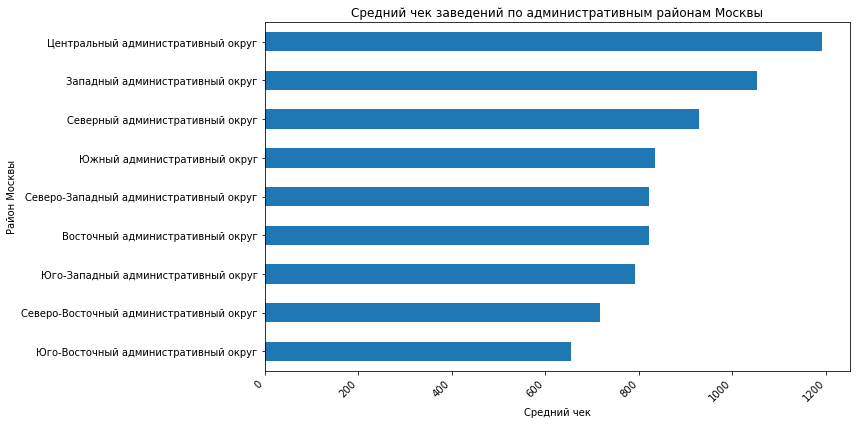

In [57]:
plt.figure(figsize=(12, 6))  
sorted_average_bill.sort_values(ascending=True).plot(kind='barh')
plt.title("Средний чек заведений по административным районам Москвы")
plt.xlabel("Средний чек")
plt.ylabel("Район Москвы")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [58]:
# Создаем переменную для фильтрации по Центральному административному округу
cao_district = 'Центральный административный округ'
cao_establishments = df_new[df_new['district'] == cao_district]
# Создаем переменную для фильтрации остальных районов Москвы, исключая ЦАО
other_districts_establishments = df_new[df_new['district'] != cao_district]
# Считаем средний чек по ЦАО и по другим районам
cao_bill_stats = cao_establishments['middle_avg_bill'].mean()
other_districts_bill_stats = other_districts_establishments['middle_avg_bill'].mean()
display("Средний чек в Центральном административном округе")
display(cao_bill_stats)
display("Средний чек в остальных районах Москвы")
display(other_districts_bill_stats)

'Средний чек в Центральном административном округе'

1191.0575471698114

'Средний чек в остальных районах Москвы'

839.8228817616084

## 3.18  Вывод
- Центральный административный округ (ЦАО) имеет самый высокий средний чек со значительным отрывом (1191). Это говорит о том, что заведения в самом центре Москвы в целом дороже, чем в других районах.
- По мере удаления от центра наблюдается общая тенденция к снижению среднего размера счёта. В таких районах, как Западный, Северный и Южный административные округа, средний размер счёта постепенно снижается по сравнению с ЦАО.
- В таких районах, как Юго-Восточный, Северо-Восточный и Юго-Западный административные округа, расположенных на окраинах Москвы, одни из самых низких средних цен, что говорит о более дешёвых заведениях.
- Средний счет в ЦAO (1191) значительно выше, чем средний счет во всех остальных округах (839,82).

### 3.19  Задача 9
Проведем исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.

In [59]:
# Выведем среднюю чашку кофе по районам
coffee_data = df_new.dropna(subset=['middle_coffee_cup'])
avg_coffee_by_district = coffee_data.groupby('district')['middle_coffee_cup'].mean().sort_values(ascending=False)
display(avg_coffee_by_district)

district
Западный административный округ            189.640000
Центральный административный округ         188.210843
Юго-Западный административный округ        183.485714
Восточный административный округ           174.023810
Северо-Восточный административный округ    165.333333
Северный административный округ            165.090909
Северо-Западный административный округ     160.458333
Южный административный округ               157.826087
Юго-Восточный административный округ       150.771429
Name: middle_coffee_cup, dtype: float64

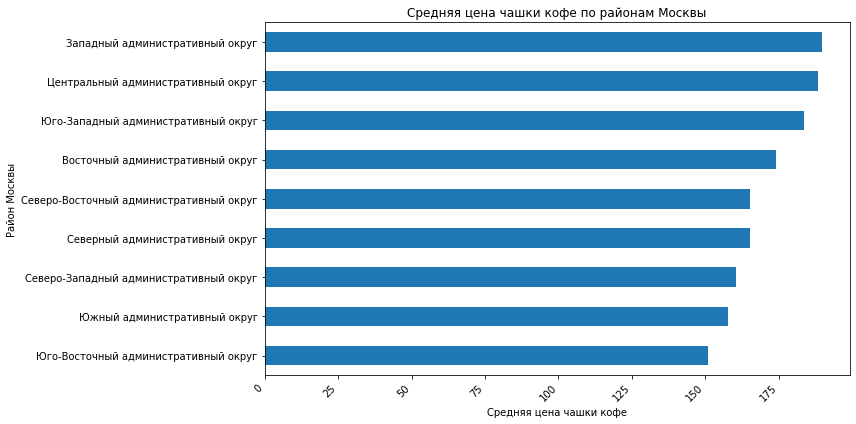

In [60]:
plt.figure(figsize=(12, 6))
avg_coffee_by_district.sort_values(ascending=True).plot(kind='barh')
plt.title('Средняя цена чашки кофе по районам Москвы')
plt.xlabel('Средняя цена чашки кофе')
plt.ylabel('Район Москвы')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
# Выведем среднюю цену чашки кофе в зависимости от категорий заведений
avg_coffee_by_category = coffee_data.groupby('category')['middle_coffee_cup'].mean().sort_values(ascending=False)
# Добавим количество чашек кофе (количество заведений, в которых есть данные о цене кофе)
coffee_counts_by_category = coffee_data.groupby('category')['middle_coffee_cup'].count()

# Объединим результаты в один DataFrame для удобства просмотра
coffee_stats_category = pd.DataFrame({'Средняя цена': avg_coffee_by_category,
                                      'Количество заведений': coffee_counts_by_category})
coffee_stats_category = coffee_stats_category.sort_values(by='Средняя цена', ascending=False)
display("Статистика по средней цене и количеству заведений с данными о кофе по категориям:")
display(coffee_stats_category)

'Статистика по средней цене и количеству заведений с данными о кофе по категориям:'

,Средняя цена,Количество заведений
category,,
"бар,паб",208.333333,6
кофейня,175.055662,521
пиццерия,153.333333,3
быстрое питание,140.000000,1
кафе,105.500000,4


## 3.20  Вывод
- Самые высокие цены в Западном и Центральном округах: в Западном административном округе (ЗАО) и Центральном административном округе (ЦАО) самые высокие средние цены на кофейные чашки — около 188–190 рублей. Это может быть связано с более высокими эксплуатационными расходами, более состоятельной клиентурой или большей концентрацией элитных кофеен и ресторанов в этих районах.
- Более низкие цены в Юго-Восточном округе: в Юго-Восточном АО самая низкая средняя цена за чашку кофе (около 150 рублей). Это говорит о том, что кофейни в этом районе ориентированы на более чувствительный к ценам рынок или имеют более низкие операционные расходы.
- Количество заведений, предоставляющих данные о цене кофе, сильно варьируется в зависимости от категории. В кофейнях таких заведений намного больше (521), чем в остальных категориях. Это означает, что средняя цена для кофеен является более надежной и репрезентативной, чем для других категорий.
- Для баров/пабов, пиццерий, заведений быстрого питания и кафе данные о цене кофе представлены очень небольшим количеством заведений (от 1 до 6). Это означает, что средняя цена для этих категорий может быть неточной и не отражать реальную ситуацию на рынке.
- В целом можно сказать, что кофейни предлагают кофе по достаточно высокой цене (175,06 руб.), и этот вывод является наиболее надёжным.
- И также можно сделать вывод, что местоположение заведения влияет на цены в заведениях.

## 3.21  Промежуточный вывод
- Кафе (2376) и рестораны (2042) являются наиболее распространенными типами заведений в нашем наборе данных и вместе составляют значительную часть всех заведений.
- В Центральном административном округе (2242 заведения) значительно выше концентрация ресторанов и кафе по сравнению со всеми остальными округами. Это говорит о том, что он является крупным центром общественного питания в городе.
- В других административных районах (Северном, Южном, Северо-Восточном, Западном, Восточном, Юго-Восточном, Юго-Западном) количество заведений примерно одинаковое и составляет от 700 до 900.

- Все категории заведений представлены как сетевые, так и несетевые. В большинстве категорий: кафе (67%), ресторан (64%), быстрое питание (62%), бар/паб (78%), столовая(72%) преобладают несетевые заведения. В категориях булочная (61%) и пиццерия (52%) сетевых заведений больше, чем несетевых.
- Большие значения медианы количества посадочных мест у ресторанов (86,0), баров (82,0), кофеин (80,0). В этих категориях ориентированы на предоставление сидячих мест для посетителей. Наименьшие значения медианы у булочных (50,0), пиццерий (55,0), кафе (60,0). Можно предположить, что заведения данных категорий нацелены преимущественно на обслуживание клиентов на вынос.
- Средние оценки по всем категориям относительно высоки и составляют примерно от 4,05 до 4,39. Это говорит о том, что в целом заведения такого типа воспринимаются положительно.

- Существует взаимосвязь: чем выше цена в ресторане, тем выше рейтинг.
- Важно отметить, что популярность сети (большое количество заведений) не гарантирует автоматически более высокий средний рейтинг.
- Большинство сетей имеют средний рейтинг выше 4,0. Это говорит о в целом положительном уровне удовлетворенности клиентов.
- Средний счет в ЦAO (1191) значительно выше, чем средний счет во всех остальных округах (839,82).
- Местоположение заведения влияет на цены в заведениях.

# 4.1  Выводы и рекомендации
Основываясь на представленных данных, вот несколько рекомендаций для инвестора, планирующего открыть новое заведение общественного питания в Москве:

1. Определение формата заведения:
- Несетевое кафе или ресторан: учитывая, что несетевые заведения преобладают в категориях «кафе» (67%) и «ресторан» (64%), это может быть перспективным направлением. Это позволяет гибко адаптироваться к местным потребностям и создать уникальную концепцию. Рекомендация: сосредоточьтесь на создании уникального концепта и качественном сервисе, чтобы выделиться на фоне конкурентов.
- Сетевая булочная или пиццерия: если вы планируете масштабируемый бизнес, рассмотрите возможность открытия сетевой булочной (61% сетевых) или пиццерии (52% сетевых). Рекомендация: используйте стандартизацию и отлаженные процессы для обеспечения стабильного качества и масштабирования.
- Кофейня: Учитывая почти равную долю сетевых и несетевых кофеен, можно рассмотреть оба варианта.
2. Выбор местоположения:
- Центральный административный округ (ЦАО): несмотря на высокую конкуренцию (2242 заведения), ЦАО привлекает более платежеспособную аудиторию, что подтверждается самым высоким средним чеком (1191 руб.). Рекомендация: если концепция заведения соответствует высоким стандартам и ценам, ЦАО может быть выгодным местом.
- Другие округа: в других округах (Северном, Южном и т. д.) конкуренция ниже (700–900 заведений), что может облегчить привлечение клиентов.
3. Формирование ценовой политики:
- Учитывая корреляцию цены и рейтинга: данные показывают, что более высокая цена связана с более высоким рейтингом (корреляция 0,22). Рекомендация: не стоит экономить на качестве ингредиентов и обслуживании, так как это положительно влияет на восприятие заведения.
- Анализируя средний чек по районам: средний чек в ЦАО значительно выше (1191 руб.), чем в других округах (839,82 руб.). Рекомендация: устанавливайте цены, соответствующие экономическим условиям выбранного района.
4. Количество посадочных мест:
- В ресторанах, барах и кофейнях обычно больше посадочных мест (медиана 86, 82 и 80 соответственно), чем в булочных, пиццериях и кафе (медиана 50, 55 и 60 соответственно). Рекомендация: определите приоритетность: обслуживание на месте или на вынос, и соответствующим образом спланируйте количество посадочных мест.
5. Рейтинг и качество:
- Стремитесь к высокому рейтингу: средние оценки по всем категориям высоки (4,05-4,39). Рекомендация: постоянно работайте над качеством продукции и сервиса, чтобы поддерживать высокий уровень удовлетворенности клиентов.
- Популярность сети не гарантирует высокий рейтинг: Рекомендация: уделяйте внимание качеству и сервису в каждом отдельном заведении, независимо от популярности бренда.
- В заключение: инвестору следует тщательно проанализировать рынок, определить целевую аудиторию, выбрать оптимальное местоположение, сформировать конкурентоспособную ценовую политику и постоянно работать над качеством продукции и сервиса. Сочетание этих факторов повысит шансы на успех нового заведения общественного питания в Москве.